In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("Downloads\DailyDelhiClimateTrain.csv")

In [3]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [5]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [6]:
df.shape

(1462, 5)

In [7]:
df['Date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
data = df.drop('date',axis=1)
data.index = df.date

In [8]:
data.head()

,meantemp,humidity,wind_speed,meanpressure,Date
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013-01-01
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013-01-02
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013-01-03
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013-01-04
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013-01-05


In [9]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [10]:
print('Time period start: {}\nTime period end: {}'.format(data.Date.min(),data.Date.max()))

Time period start: 2013-01-01 00:00:00
Time period end: 2017-01-01 00:00:00


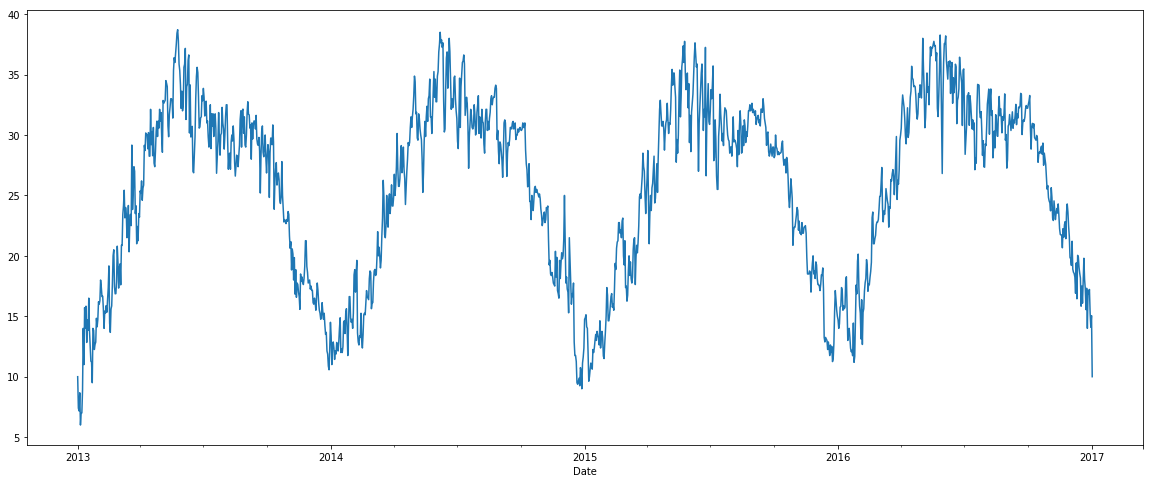

In [11]:
y = data['meantemp']
y.index = data.Date
y.plot(figsize=(20,8))
plt.show()

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

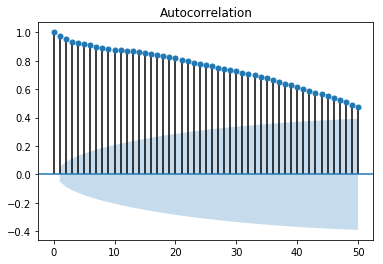

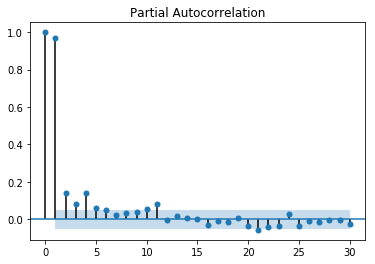

In [13]:
#plt.figure()
#plt.subplot(211)
plot_acf(y, lags = 50)
#plt.subplot(212)
plot_pacf(y, lags = 30)
plt.show()

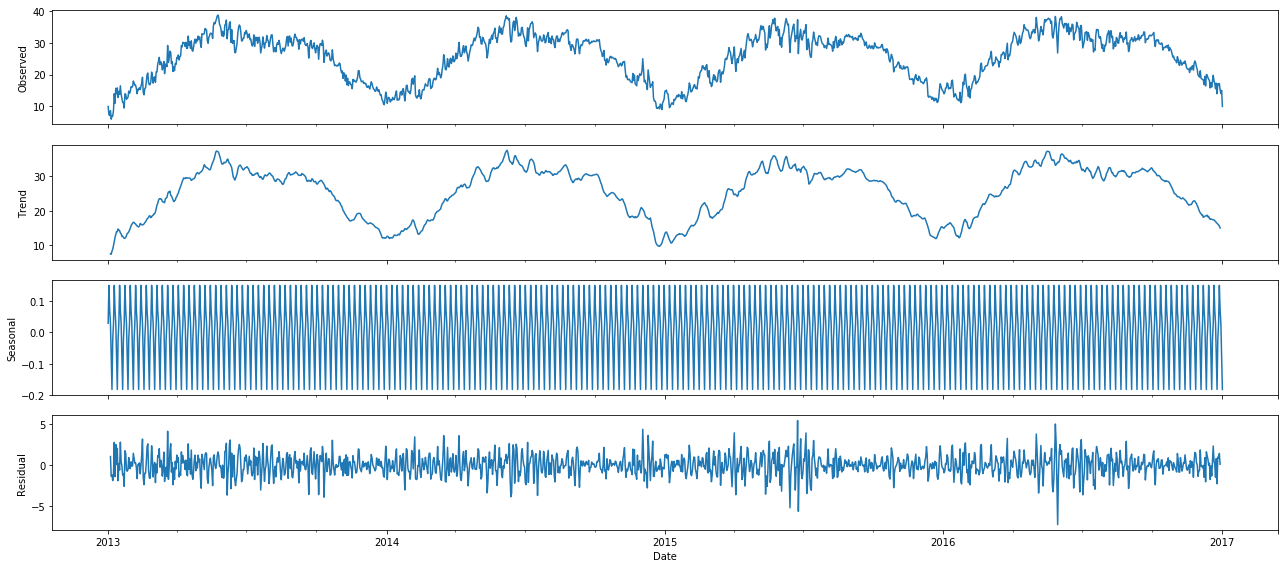

In [14]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='addictive')
fig = decomposition.plot()
plt.show()

Now we have seasonal data tht is conformed and now we will check for stationarity and try to solve it 

Stationarity and Seasonality

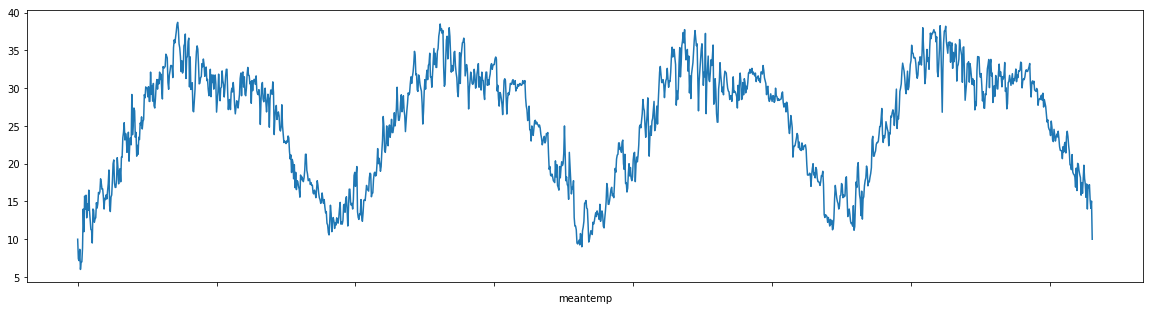

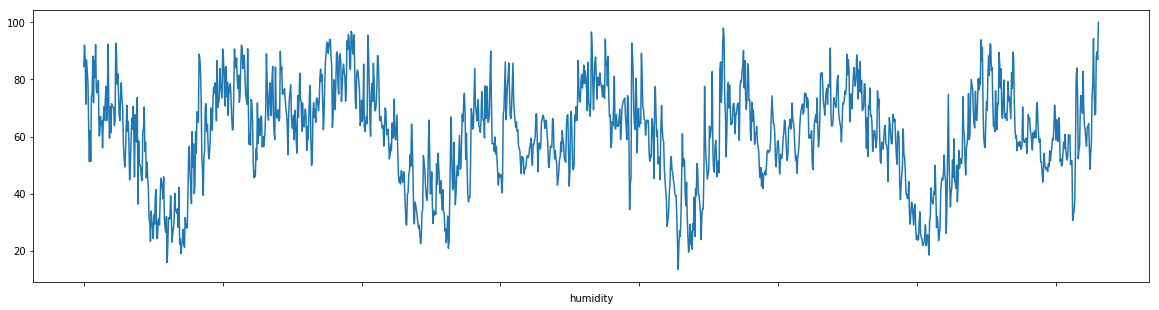

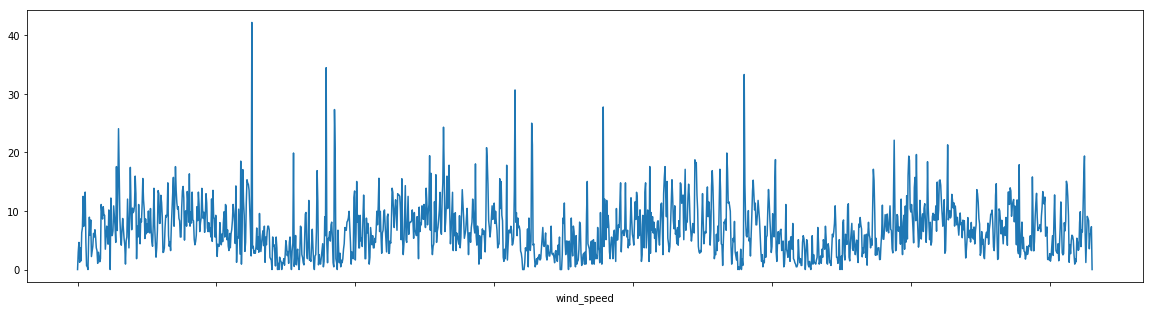

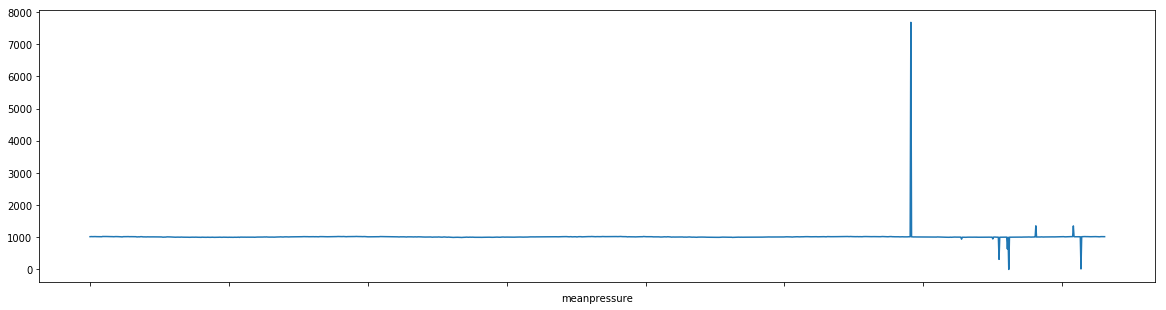

In [15]:
features = data.drop('Date',axis=1)
#features.index = data.Date
for i in features.columns :
    features[i].plot(figsize=(20,5))
    plt.xlabel(xlabel='{x}'.format(x=i))
    plt.show()

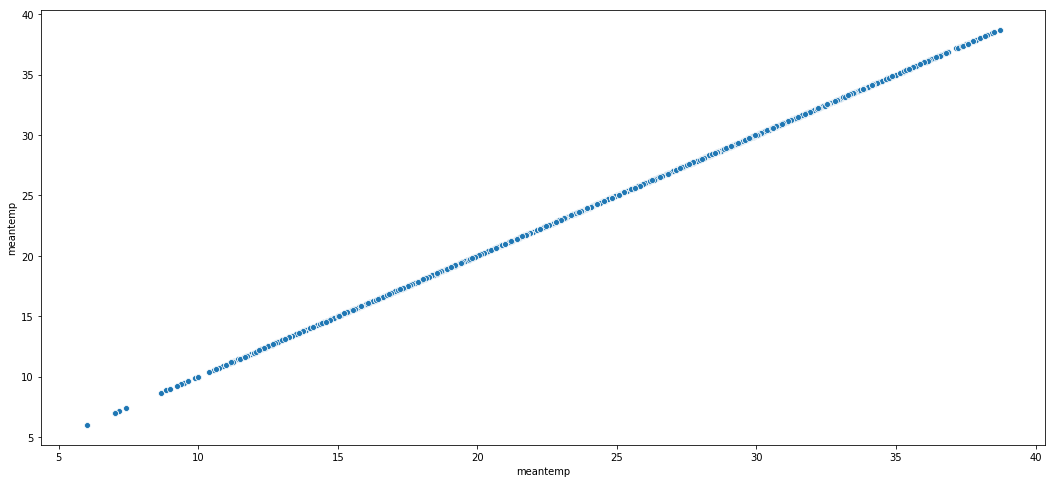

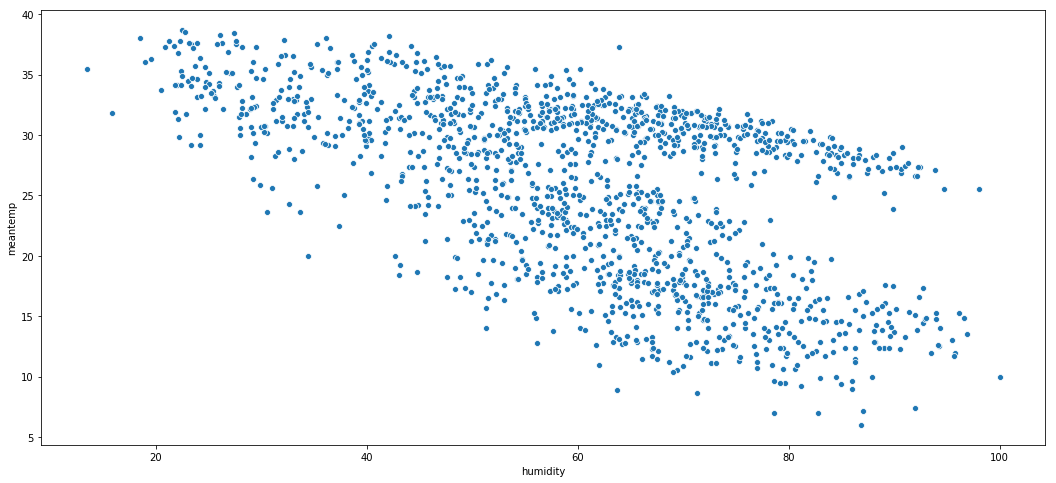

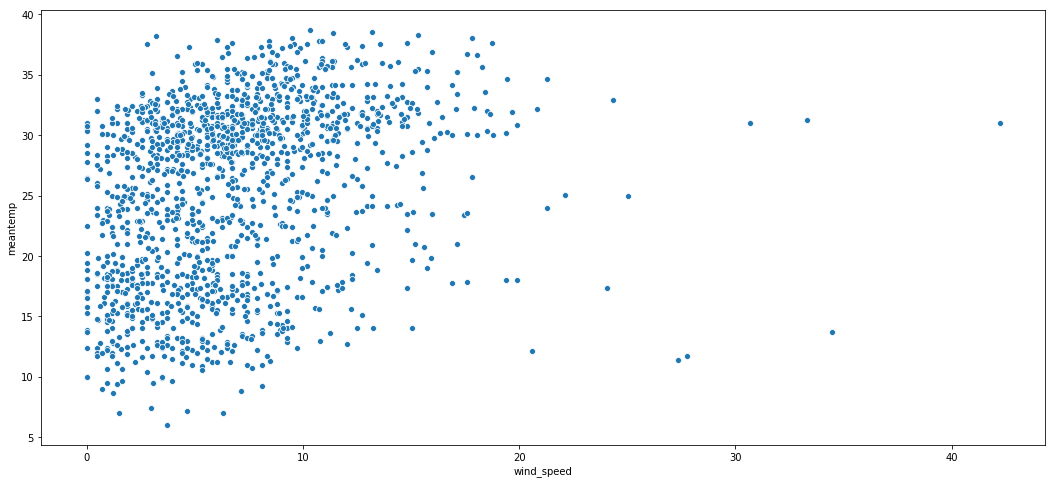

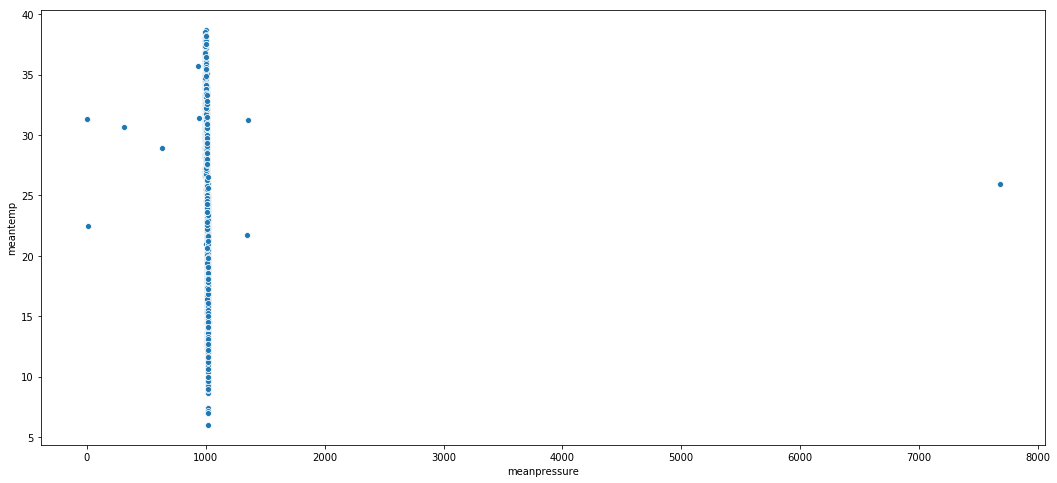

In [16]:
for i in features.columns:
        sns.scatterplot(features[i],features['meantemp'])
        plt.xlabel(xlabel='{x}'.format(x=i))
        plt.show()   

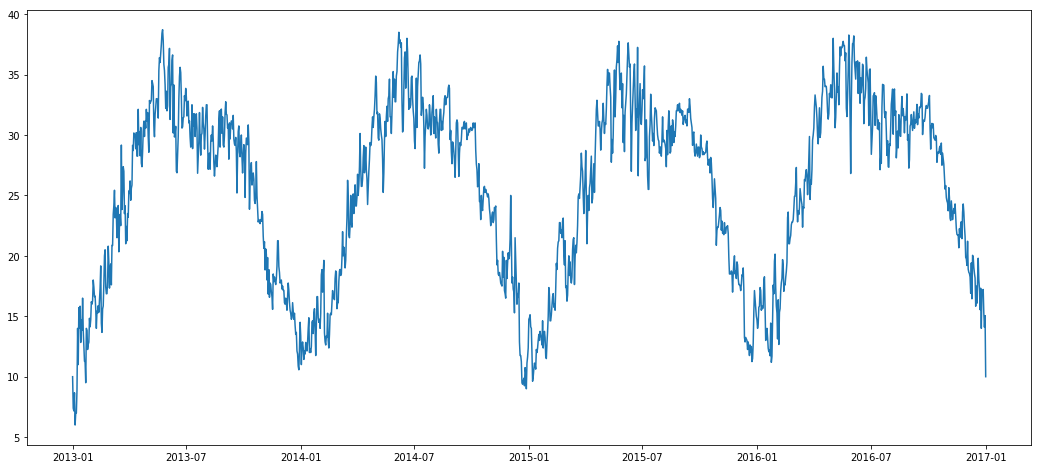

In [17]:
plt.plot(y)

DICKEY-FULLER TEST

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
print("Results of Dickey-Fuller test:-")
dftest = adfuller(y)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller test:-
Test Statistic                   -2.021069
p-value                           0.277412
#Lags Used                       10.000000
Number of Observations Used    1451.000000
Critical Value (1%)              -3.434865
Critical Value (5%)              -2.863534
Critical Value (10%)             -2.567832
dtype: float64


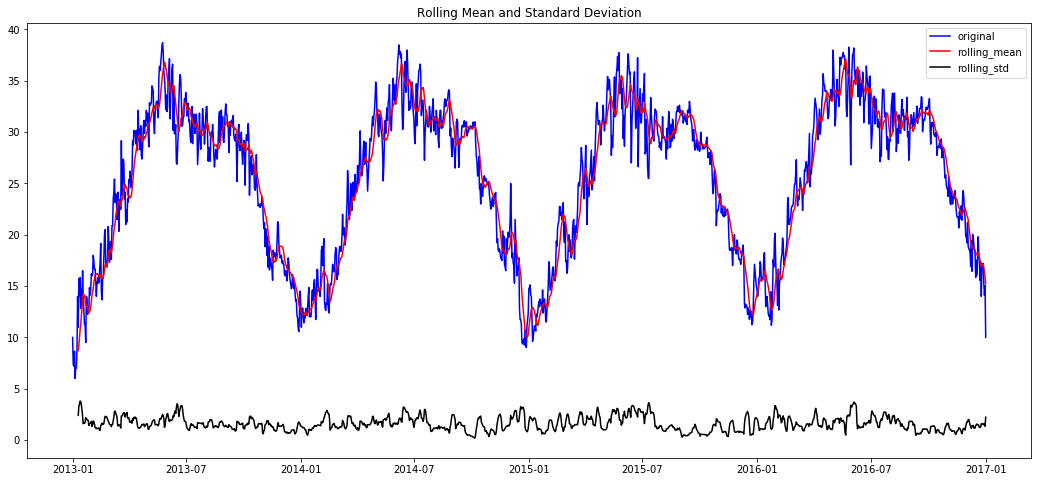

In [20]:
rolmean =y.rolling(window=10).mean()
rolstd = y.rolling(window=10).std()

# plot rolling statistics
orig = plt.plot(y,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='rolling_mean')
std = plt.plot(rolstd,color='black',label='rolling_std')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [21]:
def stdtest(ts):
    rolmean =ts.rolling(window=10).mean()
    rolstd = ts.rolling(window=10).std()

# plot rolling statistics
    orig = plt.plot(ts,color='blue',label='original')
    mean = plt.plot(rolmean,color='red',label='rolling_mean')
    std = plt.plot(rolstd,color='black',label='rolling_std')
    plt.legend(loc='best')
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block=False)
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

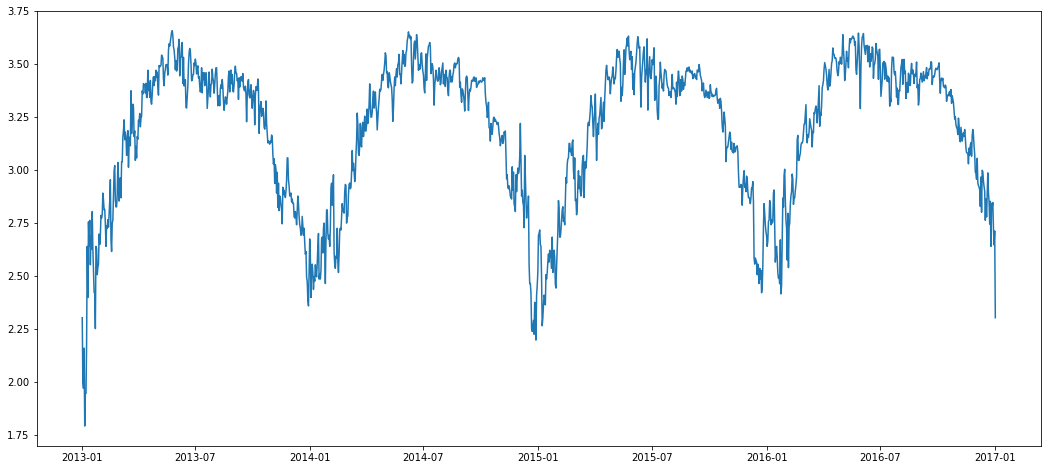

In [22]:
ts_log = np.log(y)
plt.plot(ts_log)

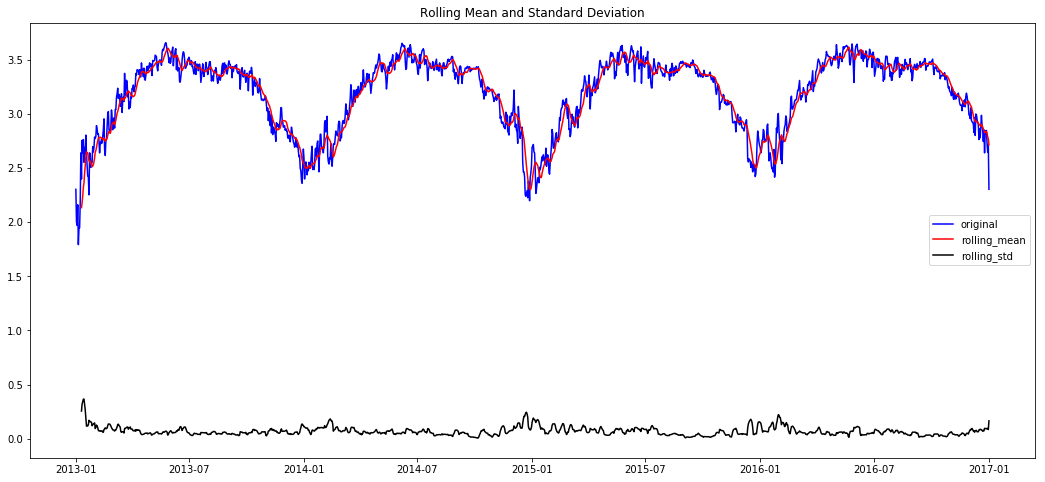

Test Statistic                   -3.586512
p-value                           0.006024
#Lags Used                        5.000000
Number of Observations Used    1456.000000
Critical Value (1%)              -3.434849
Critical Value (5%)              -2.863527
Critical Value (10%)             -2.567828
dtype: float64


In [23]:
stdtest(ts_log)

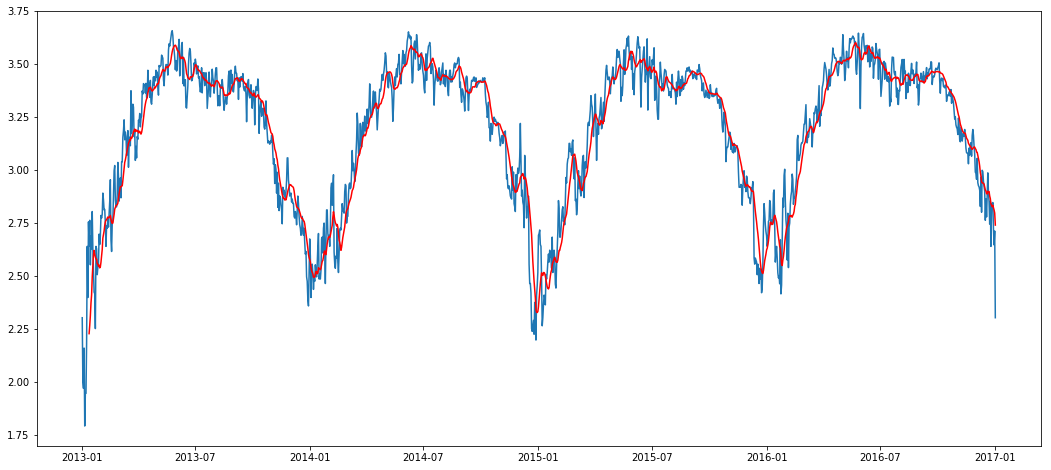

In [24]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color='red')
plt.show()

Seasonality 

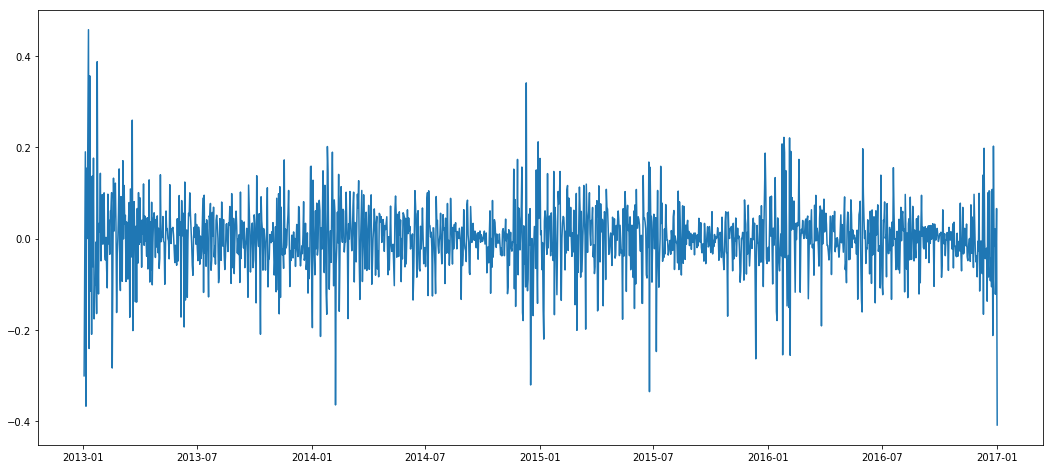

In [25]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

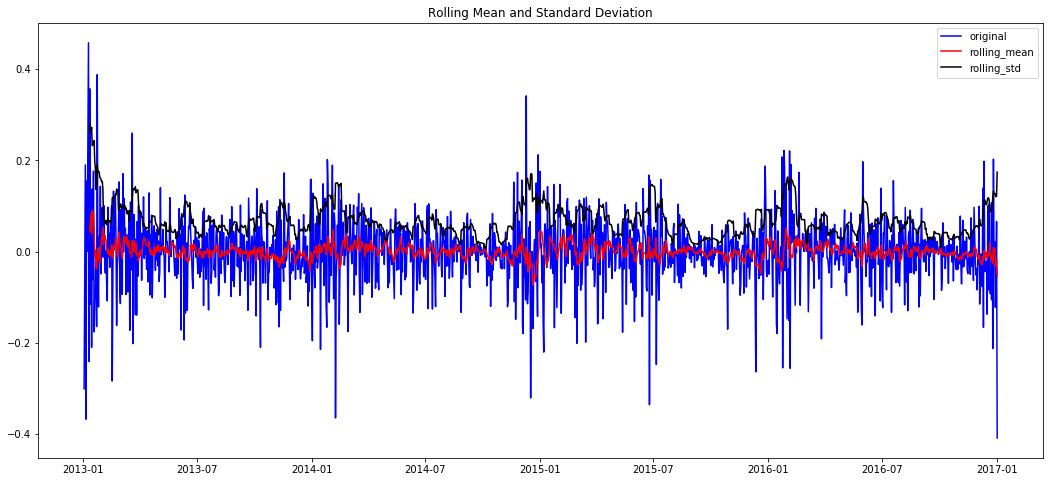

Test Statistic                  -20.887532
p-value                           0.000000
#Lags Used                        4.000000
Number of Observations Used    1456.000000
Critical Value (1%)              -3.434849
Critical Value (5%)              -2.863527
Critical Value (10%)             -2.567828
dtype: float64


In [26]:
ts_log_diff.dropna(inplace=True)
stdtest(ts_log_diff)

In [31]:
data = data.drop('Date',axis=1)
print('significance level : 0.05')
for variable in data.columns:
    adf = adfuller(data[variable])
    print(f'For {variable}')
    print(f'Test static {adf[1]}',end='\n \n')

significance level : 0.05
For meantemp
Test static 0.27741213723016056
 
For humidity
Test static 0.0044701004781308165
 
For wind_speed
Test static 0.0025407221531464205
 
For meanpressure
Test static 0.0
 


In [32]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [33]:
model = VAR(data)

C:\Users\Vishwarath Patil\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [34]:
# prediction error and thereby relative quality of statistical models,always fit a model of lag having low AIC
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print(f'lag order {i}')
    print(f'AIC of order: {result.aic}')

lag order 1
AIC of order: 17.703175084946594
lag order 2
AIC of order: 17.675812999434456
lag order 3
AIC of order: 17.648568790138913
lag order 4
AIC of order: 17.60999193192875
lag order 5
AIC of order: 17.607453802388065
lag order 6
AIC of order: 17.60380118651747
lag order 7
AIC of order: 17.61734330930204
lag order 8
AIC of order: 17.62234931932005
lag order 9
AIC of order: 17.62568892000249


In [35]:
model_fitted = model.fit(6)

In [37]:
qwer = data.dropna()
lag_order = model_fitted.k_ar
X = qwer[:-lag_order]
Y = qwer[-lag_order:]

In [45]:
y=X.values[-lag_order:]
forcast = model_fitted.forecast(y,steps=lag_order)

In [47]:
df_forecast = pd.DataFrame(forcast,index=data.index[-lag_order:],columns=Y.columns)
df_forecast

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-27,17.348792,70.642850,7.421823,1114.035254
2016-12-28,17.726869,68.599848,6.255075,1010.853957
2016-12-29,17.496228,70.909252,6.333213,992.402101
2016-12-30,17.648930,72.704921,5.795082,1004.788372
2016-12-31,17.642094,73.481324,5.946337,1031.434268
2017-01-01,17.884142,72.291600,5.717422,1026.203648


In [48]:
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
for i in data.columns:
    print(f'RMSE of {i} is {sqrt(mean_squared_error(Y[[i]],df_forecast[[i]]))}')


RMSE of meantemp is 3.8101019814638217
RMSE of humidity is 15.99644292455349
RMSE of wind_speed is 2.6797429693301407
RMSE of meanpressure is 41.85478210628457


In [54]:
Test_data = pd.read_csv('Downloads\DailyDelhiClimateTest.csv')
Test_data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [55]:
Test_data.index = Test_data.date
Test_data=Test_data.drop('date',axis=1)
Test_data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [58]:
""" Forcasting the next 6 periods"""
date_range = pd.date_range('2017-01-05',periods=6)

lag_order = model_fitted.k_ar
X1,Y1 = Test_data[1:-lag_order],Test_data[-lag_order:]
input_values = Y1.values[-lag_order:]
forcast1 = model_fitted.forecast(input_values,steps=lag_order)
forcast_df1 = pd.DataFrame(forcast1,columns=X1.columns,index=date_range)
forcast_df1

,meantemp,humidity,wind_speed,meanpressure
2017-01-05,32.268428,29.294430,9.273689,1028.807335
2017-01-06,32.404384,33.362166,8.264082,996.529808
2017-01-07,32.420385,36.232933,8.283705,982.572684
2017-01-08,32.148770,38.216824,8.446112,997.883636
2017-01-09,32.057660,38.568787,8.467237,1020.024659
2017-01-10,32.083931,38.433189,8.478052,1037.946455
